## 1. library imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. `DataFrame()`

In [4]:
pd1 = pd.DataFrame({'c1' : ['2', '3'], 'c2' : ['a', 'b']}, index = ['A', 'B'])  ## dictionary
print(pd1)

  c1 c2
A  2  a
B  3  b


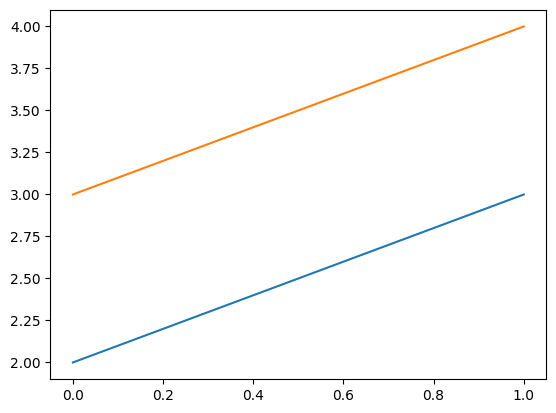

In [7]:
pd1 = pd.DataFrame({'c1':[2,3], 'c2':[3,4]})
plt.plot(pd1)
plt.show()

> matplotlib가 애초에 딕셔너리로 나눠서 이렇게 될걸?

In [66]:
df = pd.read_csv("/root/SDB2024/Python/data/v(1).csv", index_col = False, encoding = "UTF-8")  ## CP949 등
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [17]:
print(len(df))
df.Origin
# df["Origin"]

93


0     non-USA
1     non-USA
2     non-USA
3     non-USA
4     non-USA
       ...   
88    non-USA
89    non-USA
90    non-USA
91    non-USA
92    non-USA
Name: Origin, Length: 93, dtype: object

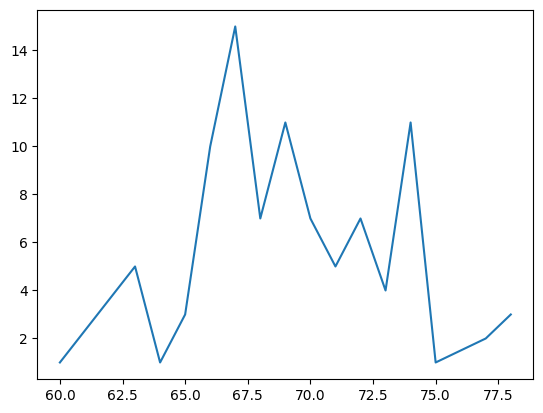

In [33]:
p = df['Width'].value_counts()
p.sort_index().plot()  ## value의 sorting을 원하면 sort_values()
plt.show()

> $y$축의 값들이 빈도가 됨

> 그룹별 연산 (`pivot_table`, `groupby().agg()`)

In [36]:
df.groupby("Origin").size()  ## 각 그룹이 몇 개 있는지 빈도

Origin
USA        48
non-USA    45
dtype: int64

In [43]:
df.groupby("Origin").aggregate({"Origin" : "count"})  ## size도 됨

,Origin
Origin,
USA,48
non-USA,45


In [44]:
sf = df.groupby(["Origin", "Type"]).size()

<AxesSubplot: xlabel='Origin'>

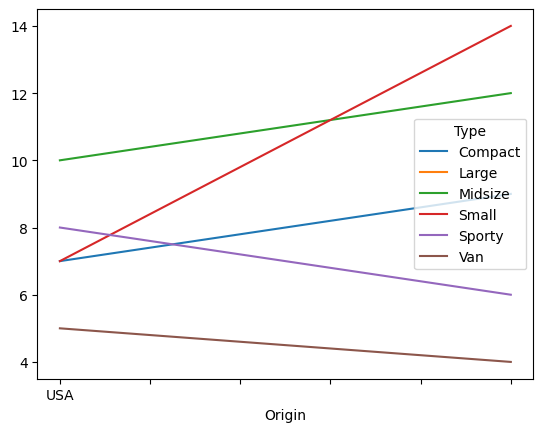

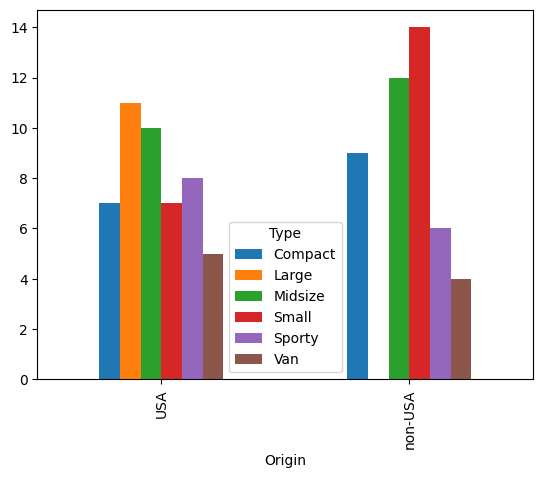

In [48]:
sf.unstack().plot()
sf.unstack().plot.bar()

> 원산지별 타입에 따른 비중으로 표시, Large는 미국만 있어서 선이 보이지 않음

`-` 데이터 슬라이싱, 병합

In [55]:
sf1 = df.iloc[:, 0:5]  ## [:, range(5)]
print(sf1)

sf2 = pd.concat((df.iloc[:, :2], df.iloc[:, 5:27]), axis = 1)
print(sf2)

   Manufacturer    Model     Type  Min.Price  Price
0         Acura  Integra    Small       12.9   15.9
1         Acura   Legend  Midsize       29.2   33.9
2          Audi       90  Compact       25.9   29.1
3          Audi      100  Midsize       30.8   37.7
4           BMW     535i  Midsize       23.7   30.0
..          ...      ...      ...        ...    ...
88   Volkswagen  Eurovan      Van       16.6   19.7
89   Volkswagen   Passat  Compact       17.6   20.0
90   Volkswagen  Corrado   Sporty       22.9   23.3
91        Volvo      240  Compact       21.8   22.7
92        Volvo      850  Midsize       24.8   26.7

[93 rows x 5 columns]
   Manufacturer    Model  Max.Price  MPG.city  MPG.highway  \
0         Acura  Integra       18.8        25           31   
1         Acura   Legend       38.7        18           25   
2          Audi       90       32.3        20           26   
3          Audi      100       44.6        19           26   
4           BMW     535i       36.2        

In [62]:
sf1.merge(sf2, on = ["Model"])  ## 둘다 모델이 완전히 겹침.
pd.merge(sf1, sf2, on = ["Model"], how = "inner")  ## 뭘로 하든 똑같음. 값이 똑같아서.

,Manufacturer_x,Model,Type,Min.Price,Price,Manufacturer_y,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,Acura,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,Acura,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,Audi,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,Audi,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,BMW,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,Volkswagen,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,Volkswagen,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,Volkswagen,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,Volvo,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


> inner join입니당.

In [70]:
sf = df.set_index(["Model"])
print(sf.sort_index())

           Manufacturer     Type  Min.Price  Price  Max.Price  MPG.city  \
Model                                                                     
100                Audi  Midsize       30.8   37.7       44.6        19   
190E      Mercedes-Benz  Compact       29.0   31.9       34.9        20   
240               Volvo  Compact       21.8   22.7       23.5        21   
300E      Mercedes-Benz  Midsize       43.8   61.9       80.0        19   
323               Mazda    Small        7.4    8.3        9.1        29   
...                 ...      ...        ...    ...        ...       ...   
Taurus             Ford  Midsize       15.6   20.2       24.8        21   
Tempo              Ford  Compact       10.4   11.3       12.2        22   
Tercel           Toyota    Small        7.8    9.8       11.8        32   
Town_Car        Lincoln    Large       34.4   36.1       37.8        18   
Vision            Eagle    Large       17.5   19.3       21.2        20   

          MPG.highway   

In [69]:
df.sort_values("Model").reset_index(drop = True)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
1,Mercedes-Benz,190E,Compact,29.0,31.9,34.9,20,29,Driver only,Rear,...,5,175,105,67,34,26.0,12.0,2920,non-USA,Mercedes-Benz 190E
2,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
3,Mercedes-Benz,300E,Midsize,43.8,61.9,80.0,19,25,Driver & Passenger,Rear,...,5,187,110,69,37,27.0,15.0,3525,non-USA,Mercedes-Benz 300E
4,Mazda,323,Small,7.4,8.3,9.1,29,37,None,Front,...,4,164,97,66,34,27.0,16.0,2325,non-USA,Mazda 323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Ford,Taurus,Midsize,15.6,20.2,24.8,21,30,Driver only,Front,...,5,192,106,71,40,27.5,18.0,3325,USA,Ford Taurus
89,Ford,Tempo,Compact,10.4,11.3,12.2,22,27,None,Front,...,5,177,100,68,39,27.5,13.0,2690,USA,Ford Tempo
90,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,Front,...,5,162,94,65,36,24.0,11.0,2055,non-USA,Toyota Tercel
91,Lincoln,Town_Car,Large,34.4,36.1,37.8,18,26,Driver & Passenger,Rear,...,6,219,117,77,45,31.5,22.0,4055,USA,Lincoln Town_Car


In [71]:
sf = df.set_index(['Manufacturer','Model'])
print(sf.sort_index())

                         Type  Min.Price  Price  Max.Price  MPG.city  \
Manufacturer Model                                                     
Acura        Integra    Small       12.9   15.9       18.8        25   
             Legend   Midsize       29.2   33.9       38.7        18   
Audi         100      Midsize       30.8   37.7       44.6        19   
             90       Compact       25.9   29.1       32.3        20   
BMW          535i     Midsize       23.7   30.0       36.2        22   
...                       ...        ...    ...        ...       ...   
Volkswagen   Eurovan      Van       16.6   19.7       22.7        17   
             Fox        Small        8.7    9.1        9.5        25   
             Passat   Compact       17.6   20.0       22.4        21   
Volvo        240      Compact       21.8   22.7       23.5        21   
             850      Midsize       24.8   26.7       28.5        20   

                      MPG.highway             AirBags DriveTrai

> 생산업체와 모델이 종속성이 있음. 특정 업체에서만 특정 모델이 생산.

In [72]:
import csv

In [77]:
vv = list(csv.DictReader(open("/root/SDB2024/Python/data/v(1).csv")))
len(vv)  ## 튜플마다 딕셔너리로 저장되었음.

93

In [78]:
vv[0]

{'Manufacturer': 'Acura',
 'Model': 'Integra',
 'Type': 'Small',
 'Min.Price': '12.9',
 'Price': '15.9',
 'Max.Price': '18.8',
 'MPG.city': '25',
 'MPG.highway': '31',
 'AirBags': 'None',
 'DriveTrain': 'Front',
 'Cylinders': '4',
 'EngineSize': '1.8',
 'Horsepower': '140',
 'RPM': '6300',
 'Rev.per.mile': '2890',
 'Man.trans.avail': 'Yes',
 'Fuel.tank.capacity': '13.2',
 'Passengers': '5',
 'Length': '177',
 'Wheelbase': '102',
 'Width': '68',
 'Turn.circle': '37',
 'Rear.seat.room': '26.5',
 'Luggage.room': '11',
 'Weight': '2705',
 'Origin': 'non-USA',
 'Make': 'Acura Integra'}

`-` 컴프리헨션

In [81]:
yy = [a for a in vv if a['Type'] == 'Small']
print(len(yy))
print(yy[0])

21
{'Manufacturer': 'Acura', 'Model': 'Integra', 'Type': 'Small', 'Min.Price': '12.9', 'Price': '15.9', 'Max.Price': '18.8', 'MPG.city': '25', 'MPG.highway': '31', 'AirBags': 'None', 'DriveTrain': 'Front', 'Cylinders': '4', 'EngineSize': '1.8', 'Horsepower': '140', 'RPM': '6300', 'Rev.per.mile': '2890', 'Man.trans.avail': 'Yes', 'Fuel.tank.capacity': '13.2', 'Passengers': '5', 'Length': '177', 'Wheelbase': '102', 'Width': '68', 'Turn.circle': '37', 'Rear.seat.room': '26.5', 'Luggage.room': '11', 'Weight': '2705', 'Origin': 'non-USA', 'Make': 'Acura Integra'}


In [92]:
maa = [a['Type']for a in vv if a['Type'].startswith("M")]  ## 딕셔너리 리스트에서의 메소드인듯, M으로 시작하는 튜플들만 반환
print(len(maa))
print(maa)

22
['Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize', 'Midsize']


`-` Type 변수의 빈도를 세어보고 그 중 가장 빈도가 높은 세 가지를 반환. 근데 이건 다른 방법도 많을듯.

In [87]:
from collections import Counter
by_type = Counter(t['Type'] for t in vv)
print(by_type)
by_type.most_common(3)

Counter({'Midsize': 22, 'Small': 21, 'Compact': 16, 'Sporty': 14, 'Large': 11, 'Van': 9})


[('Midsize', 22), ('Small', 21), ('Compact', 16)]

`-` 멀티 인덱스

In [93]:
da = pd.Series([1,2,3,4,5,6], index = [['a','b','c','a','b','c'], ['A','A','A','B','B','B']] )
print(da)
print(da['a'])
da[:,'B']

a  A    1
b  A    2
c  A    3
a  B    4
b  B    5
c  B    6
dtype: int64
A    1
B    4
dtype: int64


a    4
b    5
c    6
dtype: int64

In [95]:
print(da.unstack())
print(da.unstack(0))  ## 기본적으론 안쪽거를 위로 올림

   A  B
a  1  4
b  2  5
c  3  6
   a  b  c
A  1  2  3
B  4  5  6


In [96]:
da = pd.DataFrame(np.arange(12).reshape(6,2), index = [['a','b','c','a','b','c'], ['A','A','A','B','B','B']], columns=[['v1','v2'],['v','v']] )
print(da)
print(da.columns)

     v1  v2
      v   v
a A   0   1
b A   2   3
c A   4   5
a B   6   7
b B   8   9
c B  10  11
MultiIndex([('v1', 'v'),
            ('v2', 'v')],
           )


In [97]:
print(da['v1'])
print(da.loc['a'])

      v
a A   0
b A   2
c A   4
a B   6
b B   8
c B  10
  v1 v2
   v  v
A  0  1
B  6  7


In [99]:
print(da.loc[('a', 'A'), ('v1', 'v')])

0


`-` 인덱스 이름

In [100]:
da.index.names=['r1','r2']
da.columns.names=['c1','c2']
print(da)

c1     v1  v2
c2      v   v
r1 r2        
a  A    0   1
b  A    2   3
c  A    4   5
a  B    6   7
b  B    8   9
c  B   10  11


In [103]:
print(da.mean())  ## default : axis = 0
print(da.mean(axis = 1))

c1  c2
v1  v     5.0
v2  v     6.0
dtype: float64
r1  r2
a   A      0.5
b   A      2.5
c   A      4.5
a   B      6.5
b   B      8.5
c   B     10.5
dtype: float64


In [ ]:
df.to_csv("directory", header = True, index = False)

`-` `Join`에 대한 부분, 중요함!

In [105]:
d1 = pd.DataFrame({'key':['f','g','h'], 'data1':[3,4,6]})
d2 = pd.DataFrame({'key':['a','g','d','g','h','h'], 'data2':[1,4,5,7,9,10]})
print(d1)
print(d2)

  key  data1
0   f      3
1   g      4
2   h      6
  key  data2
0   a      1
1   g      4
2   d      5
3   g      7
4   h      9
5   h     10


In [108]:
pd.merge(d1, d2, on = "key")  ## 자연조인.

,key,data1,data2
0,g,4,4
1,g,4,7
2,h,6,9
3,h,6,10


`-` 조인 구현 구문

In [109]:
d1 = pd.DataFrame({'key':['f','g','h'], 'data1':[3,4,6]})
d2 = pd.DataFrame({'key':['a','g','d','g','h','h'], 'data2':[1,4,5,7,9,10]})
print(pd.merge(d1,d2))

print(pd.merge(d1,d2, left_on='key', right_on='key', how='right'))  ## right outer join
print(pd.merge(d1,d2, left_on='key', right_on='key', how='left'))   ## left outer join
print(pd.merge(d1,d2, left_on='key', right_on='key', how='outer'))  ## full outer join

## default : how = 'inner'

d2 = pd.DataFrame({'key2':['a','g','d','g','h','h'], 'data2':[1,4,5,7,9,10]})
print(pd.merge(d1,d2, left_on='key', right_on='key2', how='outer'))  ## 속성의 이름값이 달라도 지정이 가능
print(pd.merge(d1,d2, left_on='key', right_on='key2', how='inner'))  ## 자연조인이 아닌, 동등조인을 해줌

  key  data1  data2
0   g      4      4
1   g      4      7
2   h      6      9
3   h      6     10
  key  data1  data2
0   a    NaN      1
1   g    4.0      4
2   d    NaN      5
3   g    4.0      7
4   h    6.0      9
5   h    6.0     10
  key  data1  data2
0   f      3    NaN
1   g      4    4.0
2   g      4    7.0
3   h      6    9.0
4   h      6   10.0
  key  data1  data2
0   f    3.0    NaN
1   g    4.0    4.0
2   g    4.0    7.0
3   h    6.0    9.0
4   h    6.0   10.0
5   a    NaN    1.0
6   d    NaN    5.0
   key  data1 key2  data2
0    f    3.0  NaN    NaN
1    g    4.0    g    4.0
2    g    4.0    g    7.0
3    h    6.0    h    9.0
4    h    6.0    h   10.0
5  NaN    NaN    a    1.0
6  NaN    NaN    d    5.0
  key  data1 key2  data2
0   g      4    g      4
1   g      4    g      7
2   h      6    h      9
3   h      6    h     10


`-` 집합 연산

In [115]:
s1 = pd.Series([1,2], index=['A', 'B'])
s2 = pd.Series([2,4,5], index=['A', 'D', 'E'])
s3 = pd.Series([6,7], index=['F', 'G'])

print(pd.concat([s1,s2],axis=0))
print(pd.concat([s1,s2],axis=1))  ## cbind, NaN값으로 표시하여 데이터 보존.
pd.concat([s1, s2, s3], keys=['one', 'two', 'three'])  ## index를 멀티로 따로 지정해줌. 어떤 개체에서 왔는지를 명시

A    1
B    2
A    2
D    4
E    5
dtype: int64
     0    1
A  1.0  2.0
B  2.0  NaN
D  NaN  4.0
E  NaN  5.0


one    A    1
       B    2
two    A    2
       D    4
       E    5
three  F    6
       G    7
dtype: int64

In [118]:
print(pd.concat([s1, s2], join='inner', axis=1, keys=['one', 'two']))  ## 조인하듯 없애버림
pd.concat([s1, s2], axis=1, keys=['one', 'two'])

   one  two
A    1    2


,one,two
A,1.0,2.0
B,2.0,NaN
D,NaN,4.0
E,NaN,5.0


`-` 중복 여부 확인

In [119]:
d1 = pd.DataFrame({'key':['g','g','h'], 'data1':[3,4,4]})
d1.duplicated()
print(d1)

  key  data1
0   g      3
1   g      4
2   h      4


In [121]:
d1.duplicated()  ## 튜플의 유일성 만족

0    False
1    False
2    False
dtype: bool

`-` 중복을 없앨 때, 중복된 값 중 마지막을 남겨둠.

In [123]:
d1.drop_duplicates(['data1'], keep='last')  ## 'data1'을 기준으로 중복을 제거, (h, 4)가 남았음.

,key,data1
0,g,3
2,h,4


`-` 키와 데이터프레임으로 나뉘는 객체 생성

In [124]:
dd = d1['data1'].groupby(d1['key'])
print(dd)

`-` 객체를 `key`로 구분하여 평균을 출력(리스트 컴프리헨션을 사용하여 연산하기 편하게 만들어짐.)

In [125]:
dd.mean()

key
g    3.5
h    4.0
Name: data1, dtype: float64

In [130]:
[v.mean() for k, v in dd]

[3.5, 4.0]

`-` `key`로 구분하여 평균, 최솟값, 중앙값을 출력

In [131]:
dd.max()

key
g    4
h    4
Name: data1, dtype: int64

In [132]:
dd.min()

key
g    3
h    4
Name: data1, dtype: int64

In [133]:
dd.median()

key
g    3.5
h    4.0
Name: data1, dtype: float64